# Kaggle Competition: Ames Housing Price Prediction
- [Importing Data](#Importing-Data)
- [EDA and Clean](#EDA-and-Clean)
- [Feature Engineering](#Feature-Engineering)
- [Preprocessing](#Preprocessing)
- [Modeling](#Modeling)
- [Conclusion | Evaluation](#Conclusion-|-Evaluation)

## Importing Data

Module imports and reading the data is done in the following two cells

In [44]:
# Package import
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import patsy
from string                  import ascii_letters
from sklearn.ensemble        import VotingRegressor,RandomForestRegressor,ExtraTreesRegressor,BaggingRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.dummy           import DummyClassifier,DummyRegressor
from sklearn.pipeline        import Pipeline
from sklearn.neighbors       import KNeighborsRegressor
from sklearn.linear_model    import LogisticRegression, Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV,  KFold
from sklearn.preprocessing   import StandardScaler, PolynomialFeatures
from sklearn.metrics         import confusion_matrix, mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline 

In [45]:
# Data import
df_train = pd.read_csv("./datasets/train.csv")
df_test = pd.read_csv("./datasets/test.csv")
df_test.set_index('Id', inplace = True)
df_train.set_index('Id', inplace = True)

## EDA and Clean
- [Top](#Kaggle-Competition:-Ames-Housing-Price-Prediction)

In this section, the null values are shown. This dataframe aims to optically discern features that have missing values. These features are used to gain insight into what the data is missing. Filling in the values with some average, 0 or some dummie expansion based on the form of the data.

In [46]:
# Numnber of nulls for each feature
df_train.isnull().sum()[df_train.isnull().sum() > 0].sort_values(ascending = False)

Pool QC           2042
Misc Feature      1986
Alley             1911
Fence             1651
Fireplace Qu      1000
Lot Frontage       330
Garage Yr Blt      114
Garage Cond        114
Garage Qual        114
Garage Finish      114
Garage Type        113
Bsmt Exposure       58
BsmtFin Type 2      56
Bsmt Cond           55
Bsmt Qual           55
BsmtFin Type 1      55
Mas Vnr Type        22
Mas Vnr Area        22
Bsmt Half Bath       2
Bsmt Full Bath       2
Garage Cars          1
BsmtFin SF 1         1
BsmtFin SF 2         1
Bsmt Unf SF          1
Garage Area          1
Total Bsmt SF        1
dtype: int64

In [47]:
# Look at datatypes and complete observations for each feature in df_train
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2051 entries, 109 to 10
Data columns (total 80 columns):
PID                2051 non-null int64
MS SubClass        2051 non-null int64
MS Zoning          2051 non-null object
Lot Frontage       1721 non-null float64
Lot Area           2051 non-null int64
Street             2051 non-null object
Alley              140 non-null object
Lot Shape          2051 non-null object
Land Contour       2051 non-null object
Utilities          2051 non-null object
Lot Config         2051 non-null object
Land Slope         2051 non-null object
Neighborhood       2051 non-null object
Condition 1        2051 non-null object
Condition 2        2051 non-null object
Bldg Type          2051 non-null object
House Style        2051 non-null object
Overall Qual       2051 non-null int64
Overall Cond       2051 non-null int64
Year Built         2051 non-null int64
Year Remod/Add     2051 non-null int64
Roof Style         2051 non-null object
Roof Matl          2

In [48]:
print(f'Test Data has {df_test.shape[0]} rows and {df_test.shape[1]} columns')
print(f'Train Data has {df_train.shape[0]} rows and {df_train.shape[1]} columns')

Test Data has 879 rows and 79 columns
Train Data has 2051 rows and 80 columns


In [49]:
missing_col = set(df_train.columns) - set(df_test.columns)
print(f'There is a difference in column length of {len(missing_col)} which is the {missing_col} column') 

There is a difference in column length of 1 which is the {'SalePrice'} column


In this section we identified the problematic data points and will use dummies to handle NAN data. Following this
(!!!)

In [50]:
# This is where we split the data into categorical and non categorical data
# Inspired by Boom
df_train_numeric = df_train.select_dtypes(exclude='object')
df_train_object = df_train.select_dtypes(include='object')

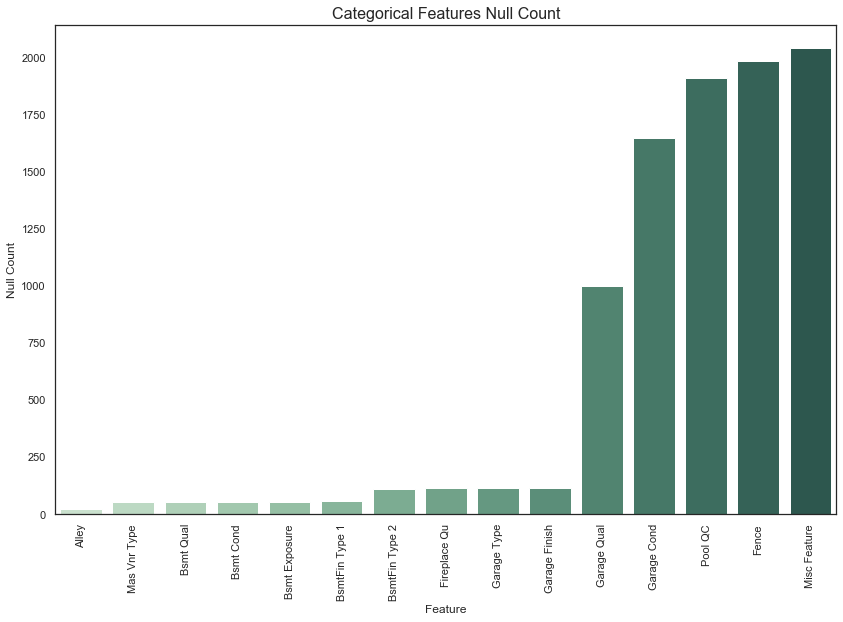

In [51]:
#Code for plotting the categorical features null count
plt.figure(figsize = (14,9))
hasnull = pd.DataFrame(df_train_object.isnull().sum()>0)
features_hasnull__object = list(hasnull[hasnull == True].dropna().index)
sns.barplot(x = features_hasnull__object, y = (df_train_object[features_hasnull__object].isnull().sum()).sort_values(),palette = "ch:2.5,-.2,dark=.3")
plt.title('Categorical Features Null Count', fontsize = 16)
plt.xlabel('Feature')
plt.ylabel('Null Count')
plt.xticks(rotation = 90);

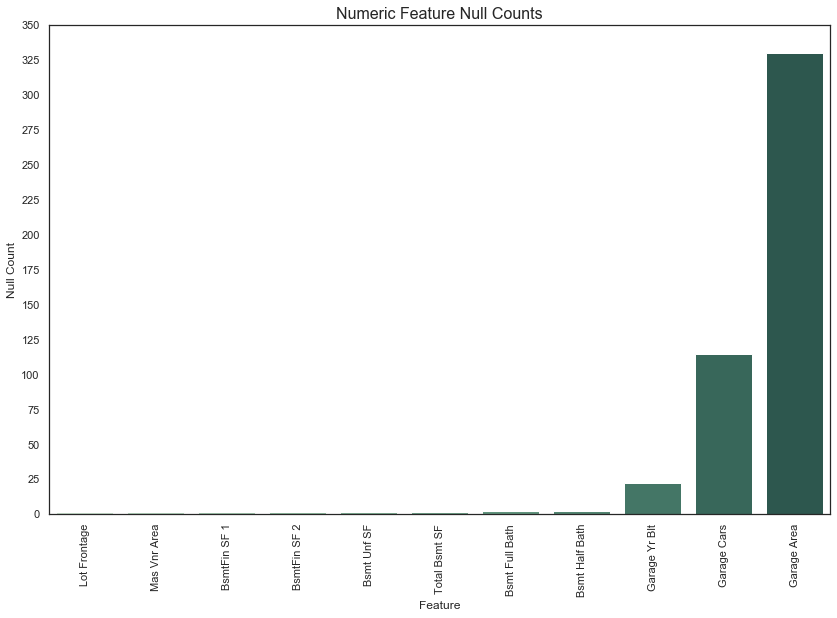

In [52]:
#Code for plotting the numeric features null count
plt.figure(figsize = (14,9))
hasnull = pd.DataFrame(df_train_numeric.isnull().sum()>0)
features_hasnull__numeric = list(hasnull[hasnull == True].dropna().index)
sns.barplot(x = features_hasnull__numeric, y = (df_train_numeric[features_hasnull__numeric].isnull().sum()).sort_values(),palette = "ch:2.5,-.2,dark=.3")
plt.title('Numeric Feature Null Counts',fontsize = 16)
plt.xlabel('Feature')
plt.ylabel('Null Count')
plt.yticks(range(0,375,25))
plt.xticks(rotation = 90,);

In [53]:
# Here I create a dataframe of 0's and 1's to represent objects as present or not
df_train_object = pd.get_dummies(df_train_object,drop_first=True,dummy_na=True)
df_train_object.head()

,MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,MS Zoning_nan,Street_Pave,Street_nan,Alley_Pave,...,Misc Feature_nan,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_WD,Sale Type_nan
Id,,,,,,,,,,,,,,,,,,,,,
109,0,0,0,0,1,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
544,0,0,0,0,1,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
153,0,0,0,0,1,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
318,0,0,0,0,1,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
255,0,0,0,0,1,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0


In [54]:
df_train_numeric.head()

,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
109,533352170,60,NaN,13517,6,8,1976,2005,289.0,533.0,...,0,44,0,0,0,0,0,3,2010,130500
544,531379050,60,43.0,11492,7,5,1996,1997,132.0,637.0,...,0,74,0,0,0,0,0,4,2009,220000
153,535304180,20,68.0,7922,5,7,1953,2007,0.0,731.0,...,0,52,0,0,0,0,0,1,2010,109000
318,916386060,60,73.0,9802,5,5,2006,2007,0.0,0.0,...,100,0,0,0,0,0,0,4,2010,174000
255,906425045,50,82.0,14235,6,8,1900,1993,0.0,0.0,...,0,59,0,0,0,0,0,3,2010,138500


In [55]:
df_train_numeric.columns

Index(['PID', 'MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area',
       'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area',
       'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath',
       'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces',
       'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Wood Deck SF',
       'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch',
       'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold', 'SalePrice'],
      dtype='object')

Based on feature type can assume that for these features the NA can be imputed with mean of feature

 - Lot Frontage is linear representation of street. If missing can assume the mean to be na
 - Lot Area is lot size in sq_ft. If missing can assume the mean to be na
 - Mas Vnr Area is Masonry veneer area in square feet can assume the mean to be na
 - 1st Flr SF is first floor area in square feet can assume the mean to be na


In [56]:
# Can treat NA separate as mean
df_train_numeric_impute_with_mean = list(['Lot Frontage','Lot Area','Mas Vnr Area','1st Flr SF'])

Based on feature type can assume that for these features the NA means 0 or otherwise non existent. 

In [57]:
# Can assume NA is 0 due to nature of the feature
df_train_numeric_impute_with_0 = list(['BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area',
       'Bsmt Full Bath', 'Bsmt Half Bath','Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces',
       'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Wood Deck SF',
       'Open Porch SF', 'Enclosed Porch','Pool Area','Misc Val','Screen Porch','3Ssn Porch','Full Bath', 'Half Bath'])

In [58]:
#This is where we split the data into categorical and non categorical data
df_test_numeric = df_test.select_dtypes(exclude='object')
df_test_object = df_test.select_dtypes(include='object')

In [59]:
# Here I create a dataframe of 0's and 1's to represent objects as present or not
df_test_object = pd.get_dummies(df_test_object,drop_first=True,dummy_na=True)
df_test_object.head()

,MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,MS Zoning_nan,Street_Pave,Street_nan,Alley_Pave,Alley_nan,...,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Type_nan
Id,,,,,,,,,,,,,,,,,,,,,
2658,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2718,0,0,0,1,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2414,0,0,0,1,0,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1989,0,0,0,0,1,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
625,0,0,0,1,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [60]:
df_test_numeric.head()

,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,...,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold
Id,,,,,,,,,,,,,,,,,,,,,
2658,902301120,190,69.0,9142,6,8,1910,1950,0.0,0,...,440,0,60,112,0,0,0,0,4,2006
2718,905108090,90,NaN,9662,5,4,1977,1977,0.0,0,...,580,170,0,0,0,0,0,0,8,2006
2414,528218130,60,58.0,17104,7,5,2006,2006,0.0,554,...,426,100,24,0,0,0,0,0,9,2006
1989,902207150,30,60.0,8520,5,6,1923,2006,0.0,0,...,480,0,0,184,0,0,0,0,7,2007
625,535105100,20,NaN,9500,6,5,1963,1963,247.0,609,...,514,0,76,0,0,185,0,0,7,2009


In [61]:
df_test_numeric.columns

Index(['PID', 'MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area',
       'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area',
       'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath',
       'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces',
       'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Wood Deck SF',
       'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch',
       'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold'],
      dtype='object')

Based on feature type can assume that for these features the NA can be imputed as mean of feature
 - Lot Frontage is linear representation of street. If missing can assume the mean to be na
 - Lot Area is lot size in sq_ft. If missing can assume the mean to be na
 - Mas Vnr Area is Masonry veneer area in square feet can assume the mean to be na
 - 1st Flr SF is first floor area in square feet can assume the mean to be na


In [62]:
# Can treat NA separate as mean
df_test_numeric_impute_with_mean = list(['Lot Frontage','Lot Area','Mas Vnr Area','1st Flr SF'])

Based on feature type can assume that for these features the NA means 0 or otherwise non existent. 

In [63]:
# Can assume NA is 0 due to nature of the feature
df_test_numeric_impute_with_0 = list(['BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area',
       'Bsmt Full Bath', 'Bsmt Half Bath','Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces',
       'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Wood Deck SF',
       'Open Porch SF', 'Enclosed Porch','Pool Area','Misc Val','Screen Porch','3Ssn Porch','Full Bath', 'Half Bath'])

## Feature Engineering
- [Top](#Kaggle-Competition:-Ames-Housing-Price-Prediction)

Numerical data that is really categorical

- MS SubClass is a category so dummy NA can be used to treat NA, the building class
- Overall Qual is a category so dummy NA can be used to treat NA, Overall material and finish quality
- Overall Cond is a category so dummy NA can be used to treat NA, Overall condition rating
- Year Built is a category so dummy NA can be used to treat NA, Original construction date
- Year Remod/Add is a category so dummy NA can be used to treat NA, Year remodel date
- Mo Sold is a category so dummy NA can be used to treat NA, Month Sold
- Yr Sold is a category so dummy NA can be used to treat NA, Year Sold

In [64]:
# Must treat NA separate
# After separating dataframe into numeric and object for train, then further separating into imputing categories; I do said functions then concatinate into one dataframe and show that there are no more null falues
df_train_numeric_categorical = list(['MS SubClass','Overall Qual','Overall Cond','Year Built','Year Remod/Add'])
df_train_numeric[df_train_numeric_categorical] = pd.get_dummies(df_train_numeric[df_train_numeric_categorical],drop_first=True,dummy_na=True)
df_train_numeric[df_train_numeric_impute_with_mean] = df_train_numeric[df_train_numeric_impute_with_mean].fillna(value = df_train_numeric[df_train_numeric_impute_with_mean].mean())
df_train_numeric[df_train_numeric_impute_with_0] = df_train_numeric[df_train_numeric_impute_with_0].fillna(value = 0)
df_train = pd.concat([df_train_numeric,df_train_object],axis = 1)
df_train.isnull().sum().sum()

0

In [65]:
# Must treat NA separate
# After separating dataframe into numeric and object for test data, then further separating into imputing categories; I do said functions then concatinate into one dataframe and show that there are no more null falues
df_test_numeric_categorical = list(['MS SubClass','Overall Qual','Overall Cond','Year Built','Year Remod/Add'])
df_test_numeric[df_test_numeric_categorical] = pd.get_dummies(df_test_numeric[df_test_numeric_categorical],drop_first=True,dummy_na=True)
df_test_numeric[df_test_numeric_impute_with_mean] = df_test_numeric[df_test_numeric_impute_with_mean].fillna(value = df_test_numeric[df_test_numeric_impute_with_mean].mean())
df_test_numeric[df_test_numeric_impute_with_0] = df_test_numeric[df_test_numeric_impute_with_0].fillna(value = 0)
df_test = pd.concat([df_test_numeric,df_test_object],axis = 1)
df_test.isnull().sum().sum()

0

In [66]:
df_train.head()

,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,...,Misc Feature_nan,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_WD,Sale Type_nan
Id,,,,,,,,,,,,,,,,,,,,,
109,533352170,60,69.0552,13517,6,8,1976,2005,289.0,533.0,...,1,0,0,0,0,0,0,0,1,0
544,531379050,60,43.0000,11492,7,5,1996,1997,132.0,637.0,...,1,0,0,0,0,0,0,0,1,0
153,535304180,20,68.0000,7922,5,7,1953,2007,0.0,731.0,...,1,0,0,0,0,0,0,0,1,0
318,916386060,60,73.0000,9802,5,5,2006,2007,0.0,0.0,...,1,0,0,0,0,0,0,0,1,0
255,906425045,50,82.0000,14235,6,8,1900,1993,0.0,0.0,...,1,0,0,0,0,0,0,0,1,0


In [67]:
df_test.head()

,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,...,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Type_nan
Id,,,,,,,,,,,,,,,,,,,,,
2658,902301120,190,69.000000,9142,6,8,1910,1950,0.0,0,...,0,0,0,0,0,0,0,0,1,0
2718,905108090,90,69.630042,9662,5,4,1977,1977,0.0,0,...,0,0,0,0,0,0,0,0,1,0
2414,528218130,60,58.000000,17104,7,5,2006,2006,0.0,554,...,0,0,0,0,0,1,0,0,0,0
1989,902207150,30,60.000000,8520,5,6,1923,2006,0.0,0,...,0,0,0,0,0,0,0,0,1,0
625,535105100,20,69.630042,9500,6,5,1963,1963,247.0,609,...,0,0,0,0,0,0,0,0,1,0


In [68]:
print(f'Test Data now has {df_test.shape[0]} rows and {df_test.shape[1]} columns')
print(f'Train Data now has {df_train.shape[0]} rows and {df_train.shape[1]} columns')

Test Data now has 879 rows and 272 columns
Train Data now has 2051 rows and 291 columns


In [69]:
# Find columns in df_test that are not in df_train and fill df_train columns with 0 such that we retain the information in dest and vice versa
train_col_not_in_test = list(set(df_train) - set(df_test))
train_col_not_in_test.remove('SalePrice')
for i in train_col_not_in_test:
    df_test[i] = 0
test_col_not_in_train = set(df_test) - set(df_train)
for i in test_col_not_in_train:
    df_train[i] = 0
df_test[train_col_not_in_test].head()

,Roof Matl_Membran,Pool QC_Fa,Functional_Sal,Heating_Wall,Garage Qual_Fa,Neighborhood_Landmrk,MS Zoning_C (all),Utilities_NoSeWa,Condition 2_Feedr,Roof Matl_CompShg,...,Heating QC_Po,Exterior 1st_ImStucc,Exterior 2nd_Stone,Electrical_Mix,Condition 2_RRNn,Exterior 1st_Stone,Exterior 1st_CBlock,Functional_Sev,Misc Feature_Gar2,Condition 2_RRAe
Id,,,,,,,,,,,,,,,,,,,,,
2658,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2718,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2414,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1989,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
625,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
df_train[test_col_not_in_train].head()

,Roof Matl_Metal,Heating_GasA,Mas Vnr Type_CBlock,Exterior 2nd_PreCast,Sale Type_VWD,Kitchen Qual_Po,Roof Matl_Roll,Exterior 1st_PreCast,Exterior 2nd_Other
Id,,,,,,,,,
109,0,0,0,0,0,0,0,0,0
544,0,0,0,0,0,0,0,0,0
153,0,0,0,0,0,0,0,0,0
318,0,0,0,0,0,0,0,0,0
255,0,0,0,0,0,0,0,0,0


Below are a few correlation plots. Here I attempt to show feature engineering and selection by selecting for correlated data with a certain correlated value. 

In [71]:
correlation = abs(df_train.corr()['SalePrice'])
features = correlation.index[np.where(correlation>0.5)][:-1]

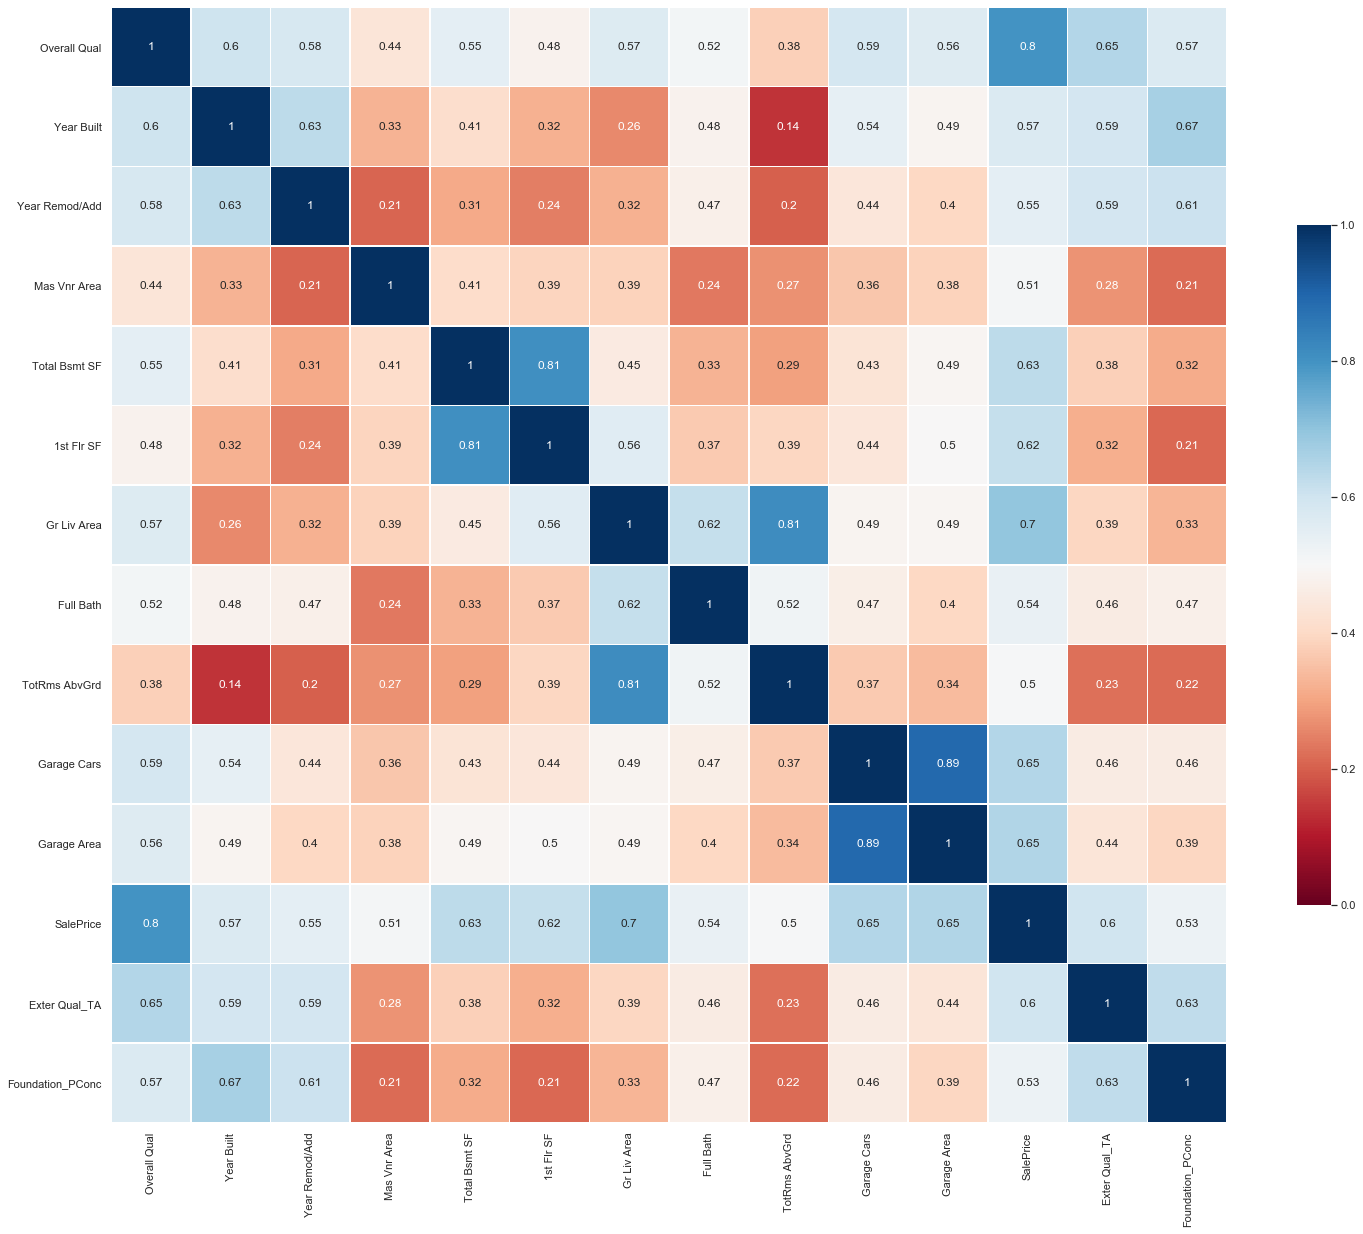

In [72]:
sns.set(style="white")

# Generate a large random dataset
rs = df_train[features]
d = pd.DataFrame(data=rs)

# Compute the correlation matrix
corr = abs(d.corr())

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(25, 25))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap='RdBu',vmin = 0 , vmax=1, center=0.5,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = True);

# Inspired by sns documentation

## Preprocessing
- [Top](#Kaggle-Competition:-Ames-Housing-Price-Prediction)

In [73]:
# This is where I defined all data for df_train as X without the SalePrice feature
# But added a y variable of only the SalePrice feature
X = df_train.drop(columns = 'SalePrice')
y = df_train['SalePrice']

## Modeling
- [Top](#Kaggle-Competition:-Ames-Housing-Price-Prediction)

Baseline

In [74]:
# Defined train_test_split here such that a Baseline could be set.
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state =42)
print(f'Baseline Train R^2 Is:{r2_score(y_train,DummyRegressor().fit(X_train,y_train).predict(X_train))}')
print(f'Baseline Test R^2 Is:{r2_score(y_test,DummyRegressor().fit(X_train,y_train).predict(X_test))}')
print(f'Train Mean Squared Error Is: R^2 Is:{mean_squared_error(y_train,DummyRegressor().fit(X_train,y_train).predict(X_train))}')
print(f'Test Mean Squared Error Is: R^2 Is:{mean_squared_error(y_test,DummyRegressor().fit(X_test,y_test).predict(X_test))}')
print(f'Train RMSE: {round(mean_squared_error(y_train,DummyRegressor().fit(X_train,y_train).predict(X_train))**0.5,-3)}')
print(f'Test RMSE: {round(mean_squared_error(y_test,DummyRegressor().fit(X_test,y_test).predict(X_test))**0.5,-3)}')

Baseline R^2 Is:0.0
Baseline R^2 Is:-0.00043273813883448753
Train Mean Squared Error Is: R^2 Is:6324520226.742479
Test Mean Squared Error Is: R^2 Is:6140024730.310918
Train RMSE: 80000.0
Test RMSE: 78000.0


Here I try to define the same model as before using BaggingRegressor, AdaBoostRegressor, RandomForestRegressor, ExtraTreesRegressor, KNeighborsRegressor and GradientBoostingRegressor but this time I keep optimal best estimator GradientBoostingRegressor, KNeighborsRegressor  and ExtraTreesRegressor paramaters with a even slighter but more optimized KNeighborsRegressor paramater tweak and with a slighter yet more optamized ExtraTreesRegressor paramater tweak with a slighter but more optimized RandomForestRegressor paramater tweak and an inital guess for AdaBoostRegressor paramaters to see an even better assumed pseudo baseline score.Scores printed are R2, Mean Squared Error for X_train, Mean Squared Error for X_test, Root Mean Squared Error for X_train, Root Mean Squared Error for X_test. After that I print best fit paramaters followed by best model score. Finally I show the model for the best estimator. Scatterplot of y vs y_hat is shown.

In [76]:
def pipeline_filled(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 42)

    vote = VotingRegressor([
        ('lasso', Lasso()),
        ('BR', BaggingRegressor()),
        ('AR', AdaBoostRegressor()),
        ('RFR', RandomForestRegressor()),
        ('ETR', ExtraTreesRegressor()),
        ('knn', KNeighborsRegressor()),
        ('GBR', GradientBoostingRegressor())
        ])
    vote_params = {
        'AR__loss': ['linear'],
        'AR__n_estimators': [100],
        'AR__learning_rate': [.5],
        'RFR__n_estimators': [3],
        'RFR__criterion': ['mae'],
        'RFR__warm_start': [False],
        'RFR__max_depth': [14],        
        'ETR__n_estimators': [5],
        'ETR__criterion': ['mse'],
        'ETR__warm_start': [False],
        'ETR__max_depth': [18],        
        'knn__n_neighbors': [8],
        'knn__weights': ['distance'],
        'knn__algorithm': ['brute'],
        'knn__leaf_size': [5],
        'knn__metric': ['minkowski'],
        'knn__p': [4],
        'GBR__n_estimators': [10],
        'GBR__max_depth': [4],
        'GBR__learning_rate': [0.5]
        }
    gs = GridSearchCV(vote, param_grid=vote_params,cv=25,n_jobs=4,verbose=1)
    gs.fit(X_train, y_train)
    print(f'Tuned Train R^2 Is:{r2_score(y_train,gs.predict(X_train))}')
    print(f'Tuned Test R^2 Is:{r2_score(y_test,gs.predict(X_test))}')    
    print(f'Train Mean Squared Error Is: R^2 Is:{mean_squared_error(y_train,gs.predict(X_train))}')
    print(f'Train Mean Squared Error Is: R^2 Is:{mean_squared_error(y_test,gs.predict(X_test))}')
    print(f'Train RMSE: {round(mean_squared_error(y_train,gs.predict(X_train))**0.5,-3)}')
    print(f'Test RMSE: {round(mean_squared_error(y_test,gs.predict(X_test))**0.5,-3)}')
    return gs

In [77]:
gs = pipeline_filled(X,y)

Fitting 25 folds for each of 1 candidates, totalling 25 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  25 out of  25 | elapsed:   53.9s finished


Tuned Train R^2 Is:0.9845936239927658
Tuned Test R^2 Is:0.9225037541027844
Train Mean Squared Error Is: R^2 Is:97437936.6785528
Train Mean Squared Error Is: R^2 Is:475828866.31516
Train RMSE: 10000.0
Test RMSE: 22000.0


In [78]:
gs.best_params_

{'AR__learning_rate': 0.5,
 'AR__loss': 'linear',
 'AR__n_estimators': 100,
 'ETR__criterion': 'mse',
 'ETR__max_depth': 18,
 'ETR__n_estimators': 5,
 'ETR__warm_start': False,
 'GBR__learning_rate': 0.5,
 'GBR__max_depth': 4,
 'GBR__n_estimators': 10,
 'RFR__criterion': 'mae',
 'RFR__max_depth': 14,
 'RFR__n_estimators': 3,
 'RFR__warm_start': False,
 'knn__algorithm': 'brute',
 'knn__leaf_size': 5,
 'knn__metric': 'minkowski',
 'knn__n_neighbors': 8,
 'knn__p': 4,
 'knn__weights': 'distance'}

In [79]:
gs.best_score_

0.8899615441985581

In [80]:
gs.best_estimator_

VotingRegressor(estimators=[('lasso',
                             Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                                   max_iter=1000, normalize=False,
                                   positive=False, precompute=False,
                                   random_state=None, selection='cyclic',
                                   tol=0.0001, warm_start=False)),
                            ('BR',
                             BaggingRegressor(base_estimator=None,
                                              bootstrap=True,
                                              bootstrap_features=False,
                                              max_features=1.0, max_samples=1.0,
                                              n_estimators=10, n_job...
                                                       loss='ls', max_depth=4,
                                                       max_features=None,
                                                       max_leaf_

In [81]:
y = y_train
y_hat = gs.best_estimator_.predict(X_train)

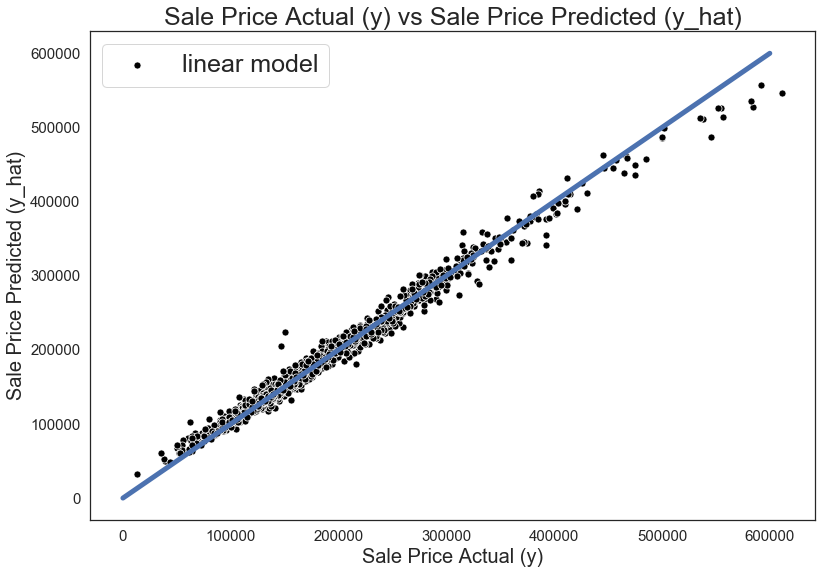

In [38]:
#  Plot of Sale Price Predicted vs. Sale Price Actual Linear Model
plt.figure(figsize = (13,9))
ax1 = sns.scatterplot(y,
                y_hat,
                color = "black" ,
                s=50,
                legend = False,
                label='linear model'
               )
ax1.axes.set_title("Sale Price Actual (y) vs Sale Price Predicted (y_hat)",fontsize=25)
ax1.set_ylabel("Sale Price Predicted (y_hat)",fontsize=20)
ax1.set_xlabel("Sale Price Actual (y)",fontsize=20)
ax1.legend(prop = {'size' : 25})
ax1.tick_params(labelsize=15)
ax1.plot([0, 600000], [0, 600000], linewidth=5);

## Conclusion | Evaluation
- [Top](#Kaggle-Competition:-Ames-Housing-Price-Prediction)

With 26 features that had missing values from one to nearly all missing the challange stemmed from learning a way to impute or in other words calculate what said missing values were. For some features it was simple, NA likely meant no feature present like pool size. So for those features it was clear what to do, while also clear to add something for floating data that was likely not added due to carelessness or other reasons. This data was managed by taking the mean of the data and adding the same value for all mising data. This was crude and not ideal. In a perfect world where time is not on such a crunch, I would model the non missing data and predict the missing data from that non missing data. Effectively making the constant guesses variant. Now for the hardest part, what do we do with categorical data that is missing but taking the average would not make sence because the data is for the lack of a better term quantized. If the quality is integer based and goes up from zero to ten by 1 imputing a value of 4.25 would not have any real world value. For this category of data I made the NA's dummies or in other words converted the NA's into a feaature of 0 or 1 if NA was there. 

Created functions to test for the best hyperparameter and estimator pair. The test RMSE is 22000 while the train RMSE 10000. The hyperparameters were as follows: 

|Estimator|Hyperparameter & Setting|
|:---:|:---:
|AdaBoostRegressor |- learning_rate: 0.5|
|AdaBoostRegressor |- loss: linear|
|AdaBoostRegressor |- n_estimators: 100|
|ExtraTreesRegressor| - criterion: mse|
|ExtraTreesRegressor| - max_depth: 18|
|ExtraTreesRegressor| - n_estimators: 5|
|ExtraTreesRegressor| - warm_start: False|
|GradientBoostingRegressor| - learning_rate: 0.5|
|GradientBoostingRegressor| - max_depth: 4|
|GradientBoostingRegressor| - n_estimators: 10|
|RandomForestRegressor| - criterion: mae|
|RandomForestRegressor| - max_depth: 14|
|RandomForestRegressor| - n_estimators: 3|
|RandomForestRegressor| - warm_start: False|
|KNeighborsRegressor| - algorithm: brute|
|KNeighborsRegressor| - leaf_size: 5|
|KNeighborsRegressor| - metric: minkowski|
|KNeighborsRegressor| - n_neighbors: 8|
|KNeighborsRegressor| - p: 4|
|KNeighborsRegressor| - weights: distance|

With an $R^2$ value of 0.98 for train data and 0.92 for test. Although this is a relatively good prediction, the model is still overfit. There are a few outliers but only one that is worth writing about. Further feature engineering where we model the NA values rather than imputing by filling NA values with means could fix the issue. This is because the mean might grossly overestimate the values filled in which can have this impact. The model would also improve in this case. It is wise not to skip on this alternative method of imputing but there is a crunch for time in this case so it will be left for future work. 


Limitations:
The limitations of this model are two as such; geography and time. There is a time decay to this model. We are in 2019 and the data was collected between 2006 to 2010. This means features may be outdated or otherwise not available. This model is also not optomized for different geographies or even demographics.

In [42]:
# Making prediction, saving it and submitting y_hat for competition 
y_hat = pd.DataFrame({'SalePrice' : gs.best_estimator_.predict(df_test)}).set_index(df_test.index)
y_hat.to_csv("./submissions/LateSubmission.csv")